**Data Science Project 3 and 4 at OESON by Yenne Yusuf Ezekiel**

In [1584]:
## Task: Performing detailed EDA and preparing an efficient machine learning model on student dataset.

***Exploratory Data Analyses (EDA)***

In [1585]:
# Importing all the necessary modules for EDA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns

# Importing all the modules for Machine Learning Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB


from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score,accuracy_score,f1_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

#metrics calculation
from sklearn import metrics
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score
from sklearn.metrics import roc_curve, roc_auc_score, auc

import warnings
warnings.filterwarnings("ignore")

In [1586]:
# Loading the student academic data
Student_academic_data = pd.read_csv('/Student_academic.csv')
Student_academic_data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [1587]:
# Checking the shape of the records
Student_academic_data.shape

(4424, 35)

In [1588]:
# Checking the data information
Student_academic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [1589]:
# Identifiying columns with Nan Values - No column with NAN
Student_academic_data.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [1590]:
# Checking for missing data - no missing data
Student_academic_data.count()

Marital status                                    4424
Application mode                                  4424
Application order                                 4424
Course                                            4424
Daytime/evening attendance                        4424
Previous qualification                            4424
Nacionality                                       4424
Mother's qualification                            4424
Father's qualification                            4424
Mother's occupation                               4424
Father's occupation                               4424
Displaced                                         4424
Educational special needs                         4424
Debtor                                            4424
Tuition fees up to date                           4424
Gender                                            4424
Scholarship holder                                4424
Age at enrollment                                 4424
Internatio

In [1591]:
#Checking the unique categories of the target column
Student_academic_data['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

<Figure size 500x300 with 0 Axes>

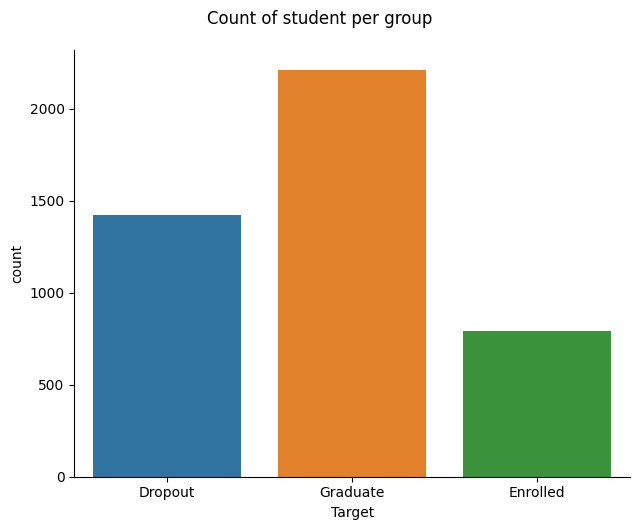

In [1592]:
# Number of unique students the target column
fig = plt.figure(figsize=(5,3))
g = sns.catplot(x="Target",kind='count',order=['Dropout', 'Graduate', 'Enrolled'], aspect=1.3, data=Student_academic_data);
g.fig.suptitle("Count of student per group",y=1.05);

In [1593]:
# Removing the record 'enrolled' as it is not one of my target
# Defining the particular variable (value) to remove
Target_remove = 'Enrolled'
# Creating a boolean mask to filter rows to keep
mask = Student_academic_data['Target'] != Target_remove
# Appling the mask to filter rows
Student_academic_data = Student_academic_data[mask]
Student_academic_data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [1594]:
Student_academic_data.shape

(3630, 35)

In [1595]:
#Checking the unique categories of the target column
Student_academic_data['Target'].unique()

array(['Dropout', 'Graduate'], dtype=object)

<Figure size 500x300 with 0 Axes>

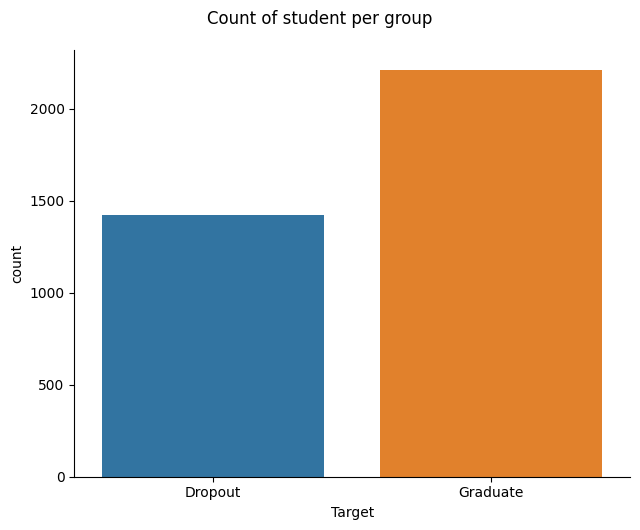

In [1596]:
# Number of unique students the target column
fig = plt.figure(figsize=(5,3))
g = sns.catplot(x="Target",kind='count',order=['Dropout', 'Graduate'], aspect=1.3, data=Student_academic_data);
g.fig.suptitle("Count of student per group",y=1.05);

In [1597]:
# converting categorical column into numerical and checking the first five columns
labelencoder = LabelEncoder()
Student_academic_data['Target'] = labelencoder.fit_transform(Student_academic_data['Target'])
Student_academic_data.head(5)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


In [1598]:
# To find the correlation among the columns with the target class using pearson method
Student_academic_data.corr(method ='pearson')

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
Marital status,1.000000,0.235554,-0.130370,0.003120,-0.265823,0.134920,-0.020139,0.177000,0.122920,0.070876,...,0.067508,0.041256,0.030786,-0.058400,-0.079536,0.025193,-0.018959,0.011932,-0.028391,-0.100479
Application mode,0.235554,1.000000,-0.246369,-0.083865,-0.276859,0.429339,-0.009654,0.096560,0.086848,0.014639,...,0.235376,0.129428,0.160493,-0.076839,-0.124287,0.052751,0.075779,-0.027668,-0.014998,-0.233888
Application order,-0.130370,-0.246369,1.000000,0.124436,0.165494,-0.204205,-0.033548,-0.055105,-0.054670,-0.036993,...,-0.127599,0.033125,-0.042519,0.072595,0.059817,-0.026822,-0.099767,-0.004228,0.033031,0.094355
Course,0.003120,-0.083865,0.124436,1.000000,-0.033420,-0.156097,0.002081,0.039210,0.031936,0.015836,...,-0.122366,0.184817,0.063649,0.104974,0.171483,-0.015006,-0.053998,0.038674,0.005770,0.006814
Daytime/evening attendance,-0.265823,-0.276859,0.165494,-0.033420,1.000000,-0.120619,0.032272,-0.179286,-0.133407,-0.035792,...,-0.105494,0.006915,0.009977,0.054211,0.058371,-0.010504,0.067192,-0.017326,0.005007,0.084496
Previous qualification,0.134920,0.429339,-0.204205,-0.156097,-0.120619,1.000000,-0.035397,0.011777,0.022088,0.001426,...,0.139557,0.052077,0.084018,-0.046298,-0.051467,0.045677,0.086015,-0.059770,0.058446,-0.102795
Nacionality,-0.020139,-0.009654,-0.033548,0.002081,0.032272,-0.035397,1.000000,-0.029701,-0.075359,0.023369,...,0.002243,-0.028418,-0.025326,-0.017487,-0.010592,-0.012158,-0.002953,-0.010158,0.028410,-0.003823
Mother's qualification,0.177000,0.096560,-0.055105,0.039210,-0.179286,0.011777,-0.029701,1.000000,0.532757,0.309000,...,0.035655,0.030811,0.030954,-0.024289,-0.031406,0.027816,-0.113616,0.055484,-0.071692,-0.048459
Father's qualification,0.122920,0.086848,-0.054670,0.031936,-0.133407,0.022088,-0.075359,0.532757,1.000000,0.222273,...,0.045833,0.028976,0.014340,0.002196,-0.007022,0.002835,-0.072628,0.061684,-0.058259,-0.003850
Mother's occupation,0.070876,0.014639,-0.036993,0.015836,-0.035792,0.001426,0.023369,0.309000,0.222273,1.000000,...,-0.003886,0.001080,-0.006691,0.030936,0.041212,-0.001678,0.009914,0.030070,0.070732,0.064195


In [1599]:
# Save the correlation plot in .xlsx format
correlation_matrix = Student_academic_data.corr()
correlation_matrix.to_excel('correlation_matrix.xlsx', index=True)


In [1600]:
# Removing columns with very low correlation with the target column based on the pearson correlation method
Student_academic_not_dropped = Student_academic_data.drop(columns=["Father's qualification", 'Nacionality', 'Educational special needs',
                                       'Unemployment rate', 'International', 'Course'])



In [1601]:
# Checking the remaining columns not drooped
Student_academic_not_dropped.columns

Index(['Marital status', 'Application mode', 'Application order',
       'Daytime/evening attendance', 'Previous qualification',
       'Mother's qualification', 'Mother's occupation', 'Father's occupation',
       'Displaced', 'Debtor', 'Tuition fees up to date', 'Gender',
       'Scholarship holder', 'Age at enrollment',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Inflation rate',
       'GDP', 'Target'],
      dtype='object')

<Axes: xlabel='Target', ylabel='Curricular units 2nd sem (enrolled)'>

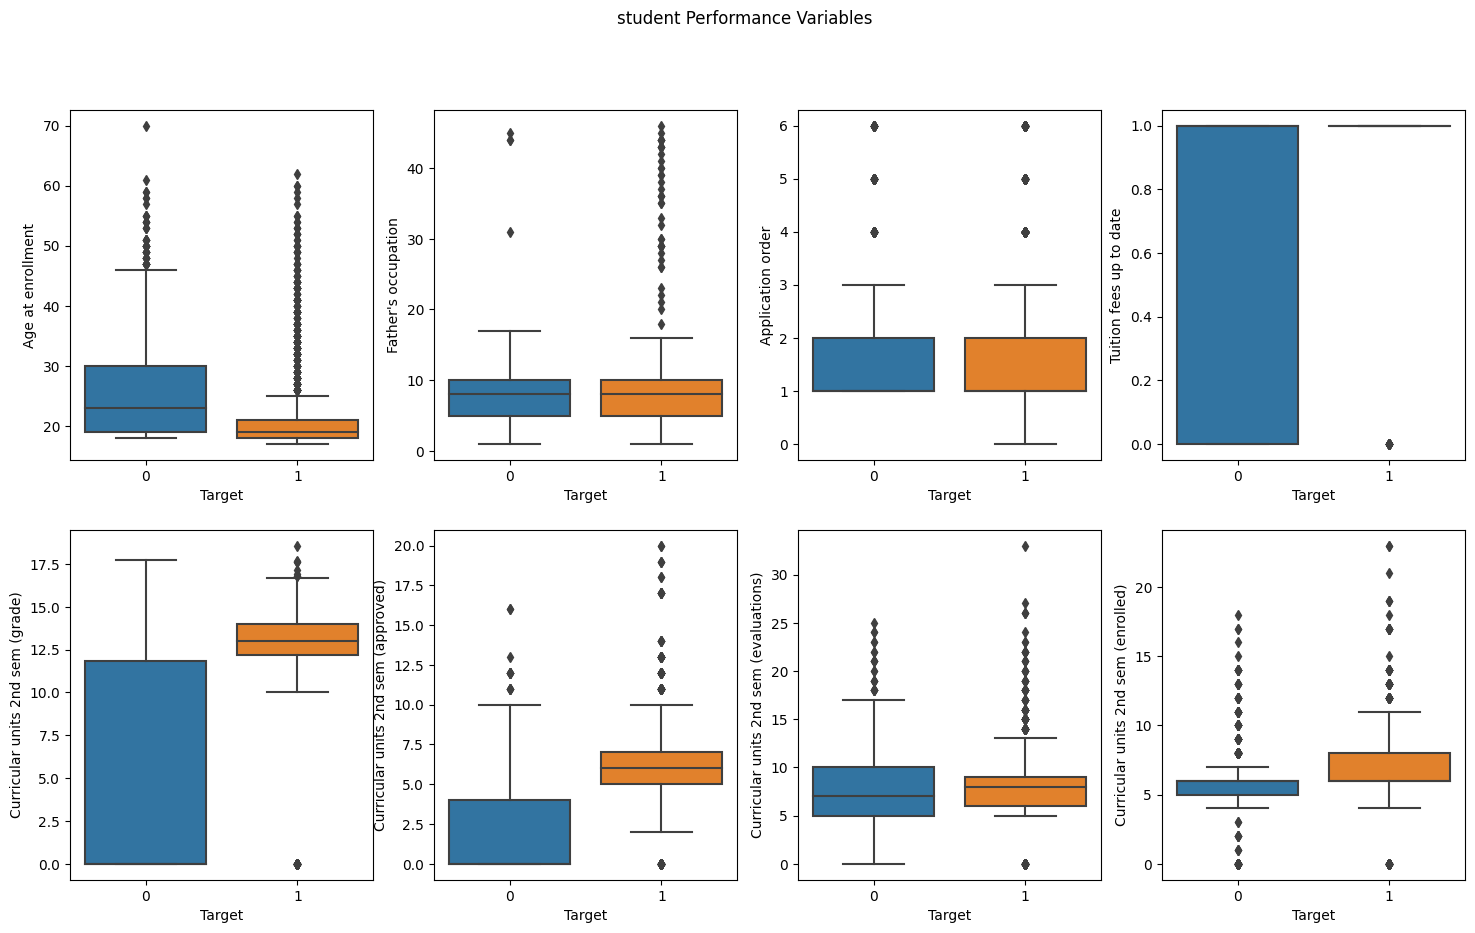

In [1602]:
## Checking for Outliers and visualizing some of the columns

fig, axes = plt.subplots(2, 4, figsize=(18, 10))

fig.suptitle('student Performance Variables')
sns.boxplot(ax=axes[0, 0], data=Student_academic_not_dropped, x='Target', y="Age at enrollment")
sns.boxplot(ax=axes[0, 1], data=Student_academic_not_dropped, x='Target', y="Father's occupation")
sns.boxplot(ax=axes[0, 2], data=Student_academic_not_dropped, x='Target', y='Application order')
sns.boxplot(ax=axes[0, 3], data=Student_academic_not_dropped, x='Target', y='Tuition fees up to date')
sns.boxplot(ax=axes[1, 0], data=Student_academic_not_dropped, x='Target', y='Curricular units 2nd sem (grade)')
sns.boxplot(ax=axes[1, 1], data=Student_academic_not_dropped, x='Target', y='Curricular units 2nd sem (approved)')
sns.boxplot(ax=axes[1, 2], data=Student_academic_not_dropped, x='Target', y='Curricular units 2nd sem (evaluations)')
sns.boxplot(ax=axes[1, 3], data=Student_academic_not_dropped, x='Target', y='Curricular units 2nd sem (enrolled)')

In [1603]:
# Identify and removing the outliers
Q1 = Student_academic_not_dropped.quantile(0.25)
Q3 = Student_academic_not_dropped.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [1604]:
## Removing the outliers for records with more than two values
df_Removed_outliers = Student_academic_not_dropped[(Student_academic_not_dropped[['Marital status', 'Application mode', 'Application order',
       'Daytime/evening attendance', 'Previous qualification',
       "Mother's qualification", "Mother's occupation", "Father's occupation",
       'Displaced', 'Debtor', 'Tuition fees up to date', 'Gender',
       'Scholarship holder', 'Age at enrollment',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Inflation rate',
       'GDP', 'Target']] >= lower_bound)
      & (Student_academic_not_dropped[['Marital status', 'Application mode', 'Application order',
      'Daytime/evening attendance', 'Previous qualification',
       "Mother's qualification", "Mother's occupation", "Father's occupation",
       'Displaced', 'Debtor', 'Tuition fees up to date', 'Gender',
       'Scholarship holder', 'Age at enrollment',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Inflation rate',
       'GDP', 'Target']] <= upper_bound)]


In [1605]:
# Checking the first 5 removed outlier records
df_Removed_outliers.head(5)

,Marital status,Application mode,Application order,Daytime/evening attendance,Previous qualification,Mother's qualification,Mother's occupation,Father's occupation,Displaced,Debtor,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Inflation rate,GDP,Target
0,1.0,8,NaN,1.0,1.0,13,6.0,10.0,1,0.0,...,0.0,0.0,NaN,0.0,0.0,NaN,0.0,1.4,1.74,0
1,1.0,6,1.0,1.0,1.0,1,4.0,4.0,1,0.0,...,0.0,0.0,6.0,6.0,6.0,13.666667,0.0,-0.3,0.79,1
2,1.0,1,NaN,1.0,1.0,22,10.0,10.0,1,0.0,...,0.0,0.0,6.0,0.0,0.0,NaN,0.0,1.4,1.74,0
3,1.0,8,2.0,1.0,1.0,23,6.0,4.0,1,0.0,...,0.0,0.0,6.0,10.0,5.0,12.400000,0.0,-0.8,-3.12,1
4,NaN,12,1.0,NaN,1.0,22,10.0,10.0,0,0.0,...,0.0,0.0,6.0,6.0,6.0,13.000000,0.0,-0.3,0.79,1


In [1606]:
# Replacing each of the NAN with the mean for each column
#df_Removed_outliers = df_Removed_outliers.fillna(df_Removed_outliers.mean())
#df_Removed_outliers.head(5)
df_Removed_outliers=df_Removed_outliers.fillna(method='bfill')
df_Removed_outliers.dropna()

,Marital status,Application mode,Application order,Daytime/evening attendance,Previous qualification,Mother's qualification,Mother's occupation,Father's occupation,Displaced,Debtor,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Inflation rate,GDP,Target
0,1.0,8,1.0,1.0,1.0,13,6.0,10.0,1,0.0,...,0.0,0.0,6.0,0.0,0.0,13.666667,0.0,1.4,1.74,0
1,1.0,6,1.0,1.0,1.0,1,4.0,4.0,1,0.0,...,0.0,0.0,6.0,6.0,6.0,13.666667,0.0,-0.3,0.79,1
2,1.0,1,2.0,1.0,1.0,22,10.0,10.0,1,0.0,...,0.0,0.0,6.0,0.0,0.0,12.400000,0.0,1.4,1.74,0
3,1.0,8,2.0,1.0,1.0,23,6.0,4.0,1,0.0,...,0.0,0.0,6.0,10.0,5.0,12.400000,0.0,-0.8,-3.12,1
4,1.0,12,1.0,1.0,1.0,22,10.0,10.0,0,0.0,...,0.0,0.0,6.0,6.0,6.0,13.000000,0.0,-0.3,0.79,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1.0,1,2.0,1.0,1.0,1,6.0,5.0,0,0.0,...,0.0,0.0,6.0,8.0,5.0,12.666667,0.0,2.8,-4.06,1
4420,1.0,1,2.0,1.0,1.0,1,10.0,10.0,1,0.0,...,0.0,0.0,6.0,6.0,2.0,11.000000,0.0,0.6,2.02,0
4421,1.0,1,1.0,1.0,1.0,22,10.0,10.0,1,0.0,...,0.0,0.0,8.0,9.0,1.0,13.500000,0.0,-0.3,0.79,0
4422,1.0,1,1.0,1.0,1.0,22,8.0,5.0,1,0.0,...,0.0,0.0,5.0,6.0,5.0,12.000000,0.0,-0.8,-3.12,1


In [1607]:
# Performing descriptive statistics on each of the data
df_Removed_outliers.describe()

,Marital status,Application mode,Application order,Daytime/evening attendance,Previous qualification,Mother's qualification,Mother's occupation,Father's occupation,Displaced,Debtor,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Inflation rate,GDP,Target
count,3630.0,3630.000000,3630.000000,3630.0,3630.0,3630.000000,3630.000000,3630.000000,3630.000000,3630.0,...,3630.0,3630.0,3630.000000,3630.000000,3630.000000,3630.000000,3630.0,3630.000000,3630.000000,3630.000000
mean,1.0,6.810193,1.309366,1.0,1.0,12.558678,6.964187,7.294766,0.549036,0.0,...,0.0,0.0,6.261433,7.484573,4.377961,12.871686,0.0,1.231598,-0.009256,0.608540
std,0.0,5.253618,0.613430,0.0,0.0,9.006183,2.969364,2.852998,0.497658,0.0,...,0.0,0.0,1.146826,3.514040,2.953550,1.381996,0.0,1.384911,2.259986,0.488144
min,1.0,1.000000,0.000000,1.0,1.0,1.000000,1.000000,1.000000,0.000000,0.0,...,0.0,0.0,2.000000,0.000000,0.000000,10.000000,0.0,-0.800000,-4.060000,0.000000
25%,1.0,1.000000,1.000000,1.0,1.0,2.000000,5.000000,5.000000,0.000000,0.0,...,0.0,0.0,6.000000,6.000000,2.000000,11.857143,0.0,0.300000,-1.700000,0.000000
50%,1.0,8.000000,1.000000,1.0,1.0,13.000000,6.000000,8.000000,1.000000,0.0,...,0.0,0.0,6.000000,8.000000,5.000000,12.800000,0.0,1.400000,0.320000,1.000000
75%,1.0,12.000000,1.000000,1.0,1.0,22.000000,10.000000,10.000000,1.000000,0.0,...,0.0,0.0,7.000000,9.000000,6.000000,13.800000,0.0,2.600000,1.790000,1.000000
max,1.0,18.000000,3.000000,1.0,1.0,29.000000,16.000000,17.000000,1.000000,0.0,...,0.0,0.0,10.000000,16.000000,12.000000,17.714286,0.0,3.700000,3.510000,1.000000


*** Machine Learning Model of the data ***

In [1608]:
# Defining the independent(X) and dependent (y) variables
X = df_Removed_outliers.drop('Target', axis=1)
y = df_Removed_outliers['Target']

In [1609]:
# Check the distribution of the target column - the data is not balanced, i.e., needs upsampling
y.value_counts()

1    2209
0    1421
Name: Target, dtype: int64

In [1610]:
# Split the data into training and testing parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [1611]:
# Carrying Principal Component Analysis on the data
pca = PCA(n_components=20)
principalComponents_train = pca.fit_transform(X_train)
principalComponents_test = pca.fit_transform(X_test)

***Logistic Regression***

In [1612]:
# Using Logistic Regression to train the data
logreg = LogisticRegression()
logreg.fit(principalComponents_train, y_train)
Y_pred = logreg.predict(principalComponents_train)
acc_log = round(logreg.score(principalComponents_train, y_train) * 100, 2)
print(acc_log)

87.92


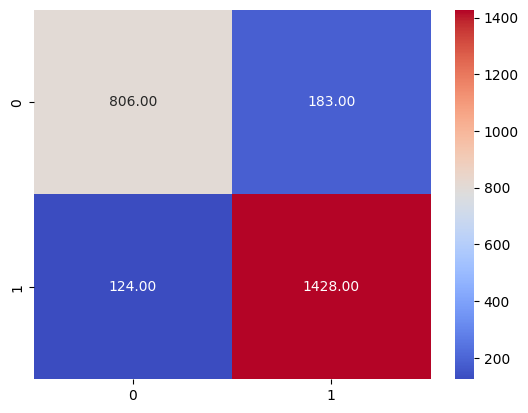

In [1613]:
# Checking prediction based on confusion matrix for the training data
predictions = logreg.predict(principalComponents_train)
data_confusion=confusion_matrix(y_train, predictions)
# Create a heatmap for the confusion matrix
sns.heatmap(data_confusion, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=True, yticklabels=True)

# Display the heatmap
plt.show()

In [1614]:
print(metrics.classification_report(y_train, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.867     0.815     0.840       989
           1      0.886     0.920     0.903      1552

    accuracy                          0.879      2541
   macro avg      0.877     0.868     0.871      2541
weighted avg      0.879     0.879     0.878      2541



In [1615]:
# Predicting using the test data
Y_pred = logreg.predict(principalComponents_test)
acc_log_test = round(logreg.score(principalComponents_test, y_test) * 100, 2)
print(acc_log_test)

82.09


In [1616]:
predictions = logreg.predict(principalComponents_test)
confusion_matrix(y_test, predictions)

array([[321, 111],
       [ 84, 573]])

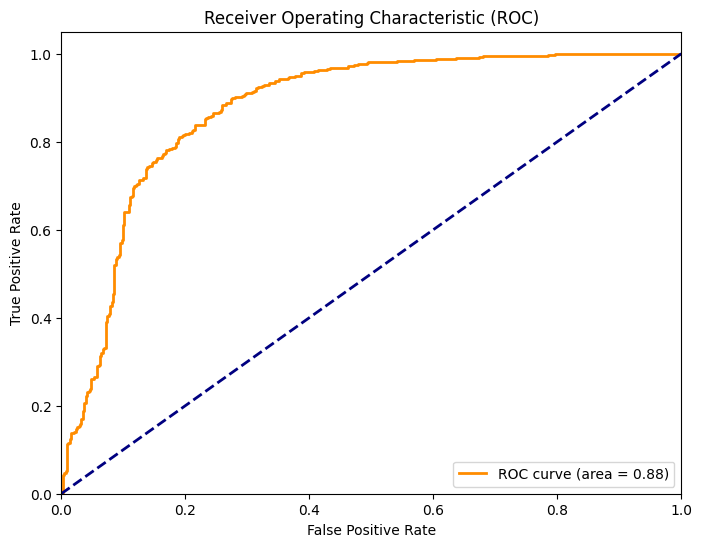

In [1617]:
# Predict probabilities for the positive class
y_scores = logreg.predict_proba(principalComponents_test)[:, 1]
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

***RandomForest Classifier***

In [1618]:
# Using RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=0)
random_forest.fit(principalComponents_train, y_train)

#predicting on train data to get train accuracy
Y_prediction = random_forest.predict(principalComponents_train)

#calcuate accuracy
random_forest.score(principalComponents_train, y_train)
acc_random_forest = round(random_forest.score(principalComponents_train, y_train) * 100, 2)
print(acc_random_forest)

100.0


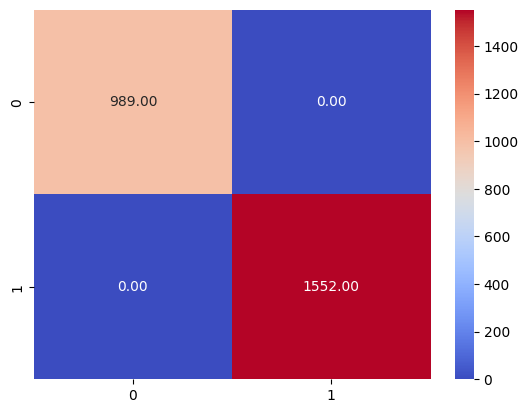

In [1619]:
# Checking prediction based on confusion matrix for the training data
predictions = random_forest.predict(principalComponents_train)
data_confusion=confusion_matrix(y_train, predictions)
# Create a heatmap for the confusion matrix
sns.heatmap(data_confusion, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=True, yticklabels=True)

# Display the heatmap
plt.show()

In [1620]:
# Print the evaluation metrics of the train model
print(metrics.classification_report(y_train, predictions, digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000       989
           1      1.000     1.000     1.000      1552

    accuracy                          1.000      2541
   macro avg      1.000     1.000     1.000      2541
weighted avg      1.000     1.000     1.000      2541



In [1621]:
# Using the randomforest classifiaction algorithm on the remaining 30% test data
Y_prediction = random_forest.predict(principalComponents_test)
random_forest.score(principalComponents_test, y_test)
acc_random_forest_test = round(random_forest.score(principalComponents_test, y_test) * 100, 2)
print(acc_random_forest_test)

82.74


In [1622]:
# Checking prediction based on confusion matrix for the test data
predictions = random_forest.predict(principalComponents_test)
data_confusion_Forest=confusion_matrix(y_test, predictions)
data_confusion_Forest

array([[339,  93],
       [ 95, 562]])

In [1623]:
# Print the evaluation metrics for the test model
print(metrics.classification_report(y_test, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.781     0.785     0.783       432
           1      0.858     0.855     0.857       657

    accuracy                          0.827      1089
   macro avg      0.820     0.820     0.820      1089
weighted avg      0.828     0.827     0.827      1089



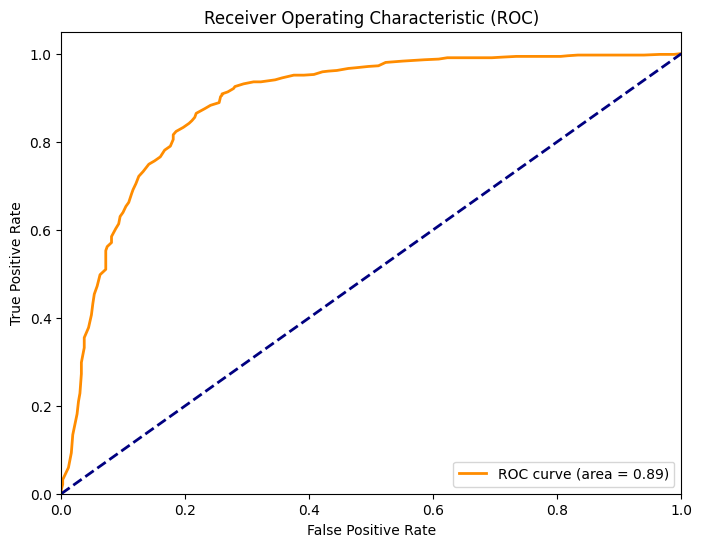

In [1624]:
# Predict probabilities for the positive class
y_scores = random_forest.predict_proba(principalComponents_test)[:, 1]
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

*** Guassian Classifier ***

In [1625]:
# Using GaussianClassifier
gaussian = GaussianNB()
gaussian.fit(principalComponents_train, y_train)
Y_prediction = gaussian.predict(principalComponents_train)
gaussian.score(principalComponents_train, y_train)
acc_gaussian = round(gaussian.score(principalComponents_train, y_train) * 100, 2)
print(acc_gaussian)

83.9


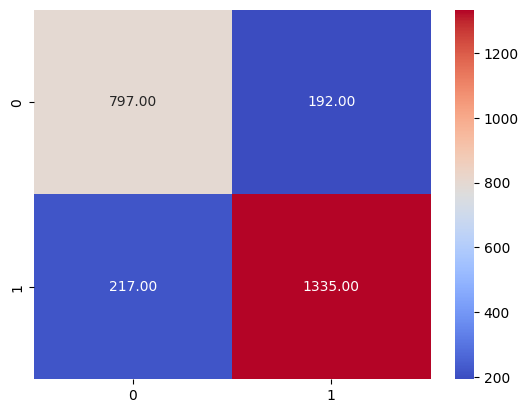

In [1626]:
# Checking prediction based on confusion matrix for the training data
predictions = gaussian.predict(principalComponents_train)
data_confusion_Gauss=confusion_matrix(y_train, predictions)
# Create a heatmap for the confusion matrix
sns.heatmap(data_confusion_Gauss, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=True, yticklabels=True)

# Display the heatmap
plt.show()

In [1627]:
# Evaluateing the trained model
print(metrics.classification_report(y_train, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.786     0.806     0.796       989
           1      0.874     0.860     0.867      1552

    accuracy                          0.839      2541
   macro avg      0.830     0.833     0.831      2541
weighted avg      0.840     0.839     0.839      2541



In [1628]:
# Predicting the test model
Y_prediction = gaussian.predict(principalComponents_test)
gaussian.score(principalComponents_test, y_test)
acc_gaussian_test = round(gaussian.score(principalComponents_test, y_test) * 100, 2)
print(acc_gaussian_test)

80.07


In [1629]:
# Performing confusion matrix analyses
predictions = gaussian.predict(principalComponents_test)
confusion_matrix(y_test, predictions)

array([[325, 107],
       [110, 547]])

In [1630]:
# Evaluateing the test model
print(metrics.classification_report(y_test, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.747     0.752     0.750       432
           1      0.836     0.833     0.834       657

    accuracy                          0.801      1089
   macro avg      0.792     0.792     0.792      1089
weighted avg      0.801     0.801     0.801      1089



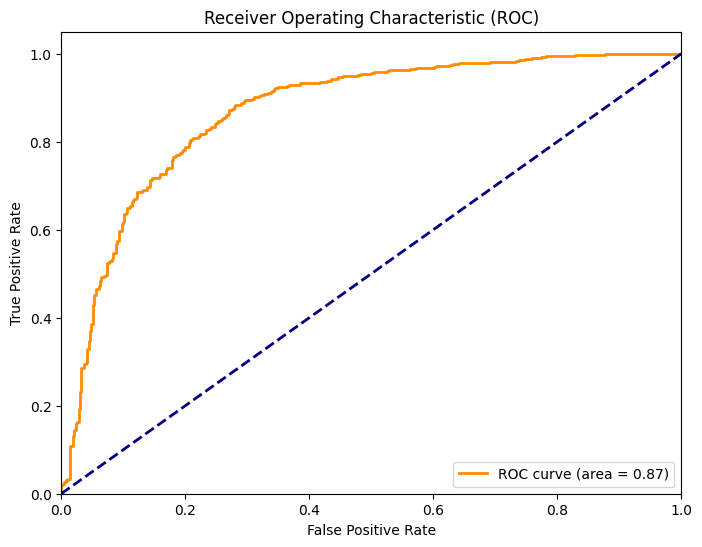

In [1631]:
# Predict probabilities for the positive class
y_scores = gaussian.predict_proba(principalComponents_test)[:, 1]
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

*** DecisionTree Classifier***

In [1632]:
# Using DecisionTree Classifier
decisiontree=DecisionTreeClassifier()
decisiontree.fit(principalComponents_train,y_train)
Y_pred=decisiontree.predict(principalComponents_train)
acc_dt=round(decisiontree.score(principalComponents_train, y_train) * 100, 2)
print(acc_dt)

100.0


In [1633]:
# Applying the Classifier on training data
predictions = decisiontree.predict(principalComponents_train)
data2=confusion_matrix(y_train, predictions)

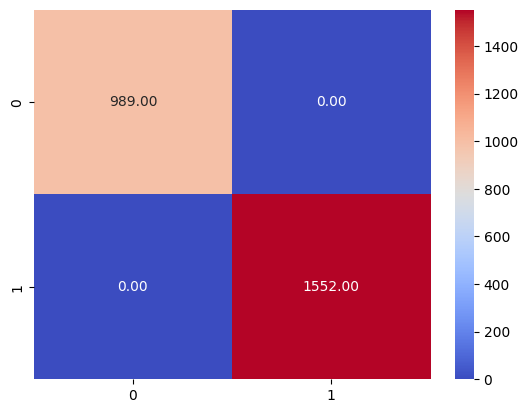

In [1634]:
# Checking prediction based on confusion matrix for the training data
predictions = decisiontree.predict(principalComponents_train)
data_confusion=confusion_matrix(y_train, predictions)
# Create a heatmap for the confusion matrix
sns.heatmap(data_confusion, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=True, yticklabels=True)

# Display the heatmap
plt.show()

In [1635]:
# Evaluateing the trained model
print(metrics.classification_report(y_train, predictions, digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000       989
           1      1.000     1.000     1.000      1552

    accuracy                          1.000      2541
   macro avg      1.000     1.000     1.000      2541
weighted avg      1.000     1.000     1.000      2541



In [1636]:
# Predicting using the DecisionTreeClassifier on the test data
Y_pred=decisiontree.predict(principalComponents_test)
acc_dt_test=round(decisiontree.score(principalComponents_test, y_test) * 100, 2)
print(acc_dt_test)

71.99


In [1637]:
# Create a sample correlation matrix
predictions = decisiontree.predict(principalComponents_test)
data3=confusion_matrix(y_test, predictions)
data3

array([[293, 139],
       [166, 491]])

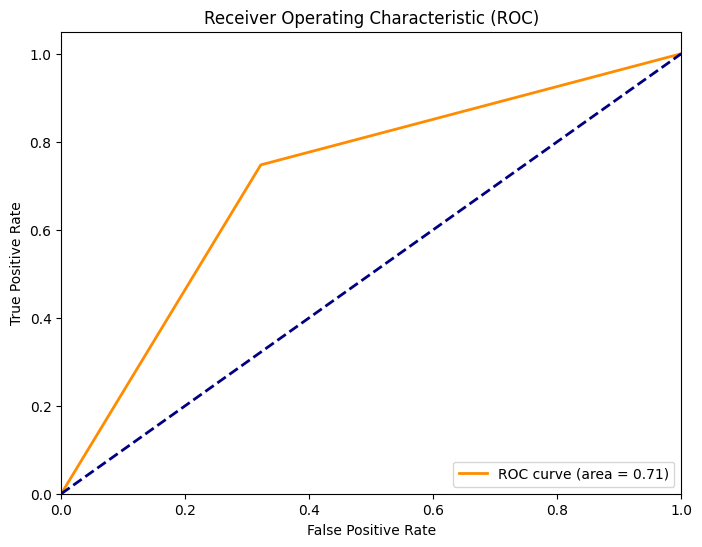

In [1638]:
# Predict probabilities for the positive class
y_scores = decisiontree.predict_proba(principalComponents_test)[:, 1]
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

*** SVC ***

In [1639]:
# Using SVC Classifier
svc=LinearSVC()
svc.fit(principalComponents_train,y_train)
Y_pred=svc.predict(principalComponents_train)
acc_svc=round(svc.score(principalComponents_train, y_train) * 100, 2)
print(acc_svc)

87.92


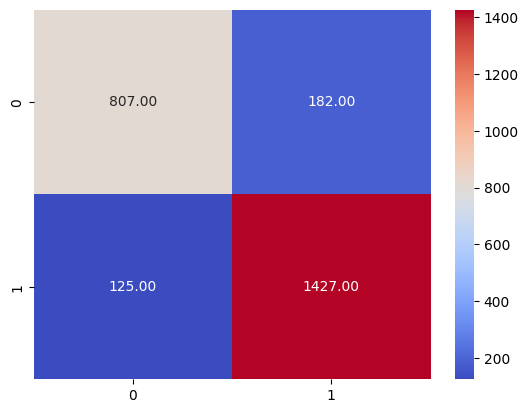

In [1640]:
# Checking prediction based on confusion matrix for the training data
predictions = svc.predict(principalComponents_train)
data_confusion_SVC=confusion_matrix(y_train, predictions)
# Create a heatmap for the confusion matrix
sns.heatmap(data_confusion_SVC, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=True, yticklabels=True)
# Display the heatmap
plt.show()

In [1641]:
# Evaluateing the trained model
print(metrics.classification_report(y_train, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.866     0.816     0.840       989
           1      0.887     0.919     0.903      1552

    accuracy                          0.879      2541
   macro avg      0.876     0.868     0.872      2541
weighted avg      0.879     0.879     0.878      2541



In [1642]:
# Predicting the test data
Y_pred=svc.predict(principalComponents_test)
acc_svc_test=round(svc.score(principalComponents_test, y_test) * 100, 2)
print(acc_svc_test)

82.0


In [1643]:
# Confusion matrix analyses on the test and predicted data
predictions = svc.predict(principalComponents_test)
confusion_matrix(y_test, predictions)

array([[320, 112],
       [ 84, 573]])

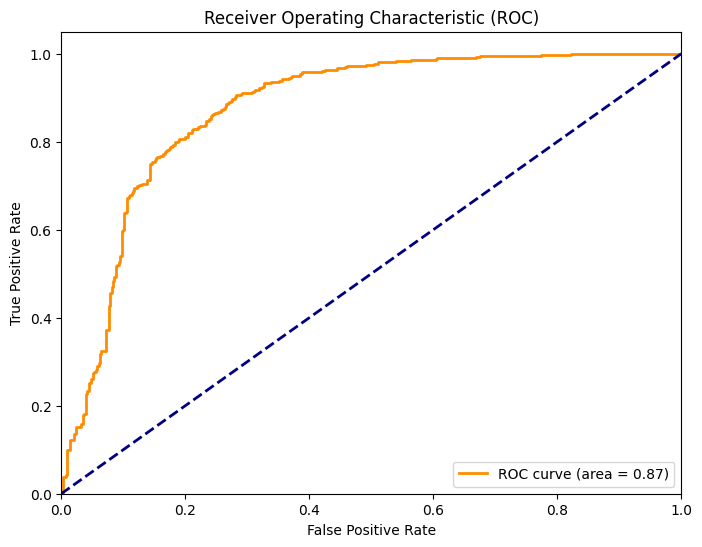

In [1644]:
# Predict probabilities for the positive class
y_scores = svc.decision_function(principalComponents_test)
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [1647]:
# Compiling and displaying the training score
results = pd.DataFrame({
    'Model': [ 'Logistic Regression',
              'Random Forest',
              'gaussian',
              'Decision Tree',
              'LinearSVC'
              ],
    'training_Score': [ acc_log, acc_random_forest, acc_gaussian, acc_dt ,acc_svc ]})
result_df = results.sort_values(by='training_Score', ascending=False)
result_df = result_df.set_index('Model')
result_df.head(9)

,training_Score
Model,
Random Forest,100.00
Decision Tree,100.00
Logistic Regression,87.92
LinearSVC,87.92
gaussian,83.90


In [1646]:
# Compiling and displaying the test score
results = pd.DataFrame({
    'Model': [ 'Logistic Regression',
              'Random Forest',
              'gaussian',
              'Decision Tree',
              'LinearSVC'
              ],
    'Testing_Score': [ acc_log_test, acc_random_forest_test, acc_gaussian_test, acc_dt_test ,acc_svc_test ]})
result_df = results.sort_values(by='Testing_Score', ascending=False)
result_df = result_df.set_index('Model')
result_df.head(9)

,Testing_Score
Model,
Random Forest,82.74
Logistic Regression,82.09
LinearSVC,82.00
gaussian,80.07
Decision Tree,71.99
